In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
import os

print("Current directory:", os.getcwd())
print("Folders here:", os.listdir())


Current directory: C:\Users\Isha Kumari\emotionPrediction
Folders here: ['.idea', '.ipynb_checkpoints', 'app.py', 'emotion_model.pkl', 'model_evaluation.ipynb', 'predict.py', 'quote_bank.py', 'requirements.txt', 'test.csv', 'tfidf_vectorizer.pkl', 'Untitled Folder', 'Untitled.ipynb', '__pycache__']


In [24]:
import os

# Use the correct folder path — no extra slashes or backslashes
base_path = "Untitled Folder"

# This should now work
print(os.listdir(base_path))

['.ipynb_checkpoints', 'test.csv', 'train.csv', 'val.csv']


In [25]:
# Step 2: Load CSV files
base_path = "Untitled Folder"

train_df = pd.read_csv(f"{base_path}/train.csv")
val_df = pd.read_csv(f"{base_path}/val.csv")
test_df = pd.read_csv(f"{base_path}/test.csv")

In [26]:
# Step 3: Combine Training and Validation
train_df = pd.concat([train_df, val_df], ignore_index=True)


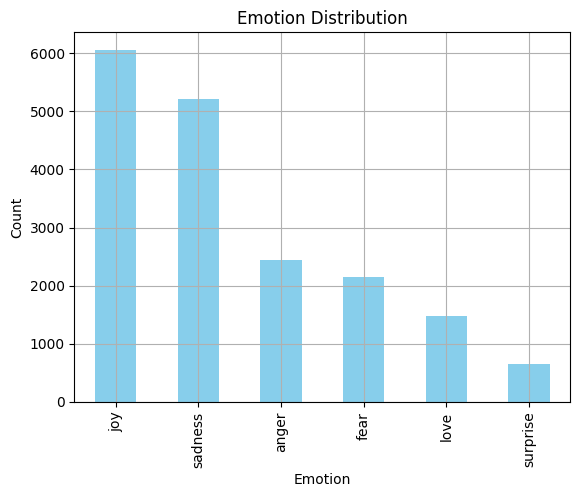

In [27]:
train_df['emotion'].value_counts().plot(kind='bar', color='skyblue', title='Emotion Distribution')
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [28]:
#  Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [29]:
y_train = train_df['emotion']
y_test = test_df['emotion']

In [30]:
# Step 5: Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(f" Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Accuracy: 0.87

 Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.83      0.86       275
        fear       0.88      0.78      0.83       224
         joy       0.84      0.96      0.90       695
        love       0.83      0.61      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.87      2000



In [33]:
#Step 7: Confusion Matrix
labels = sorted(train_df['emotion'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

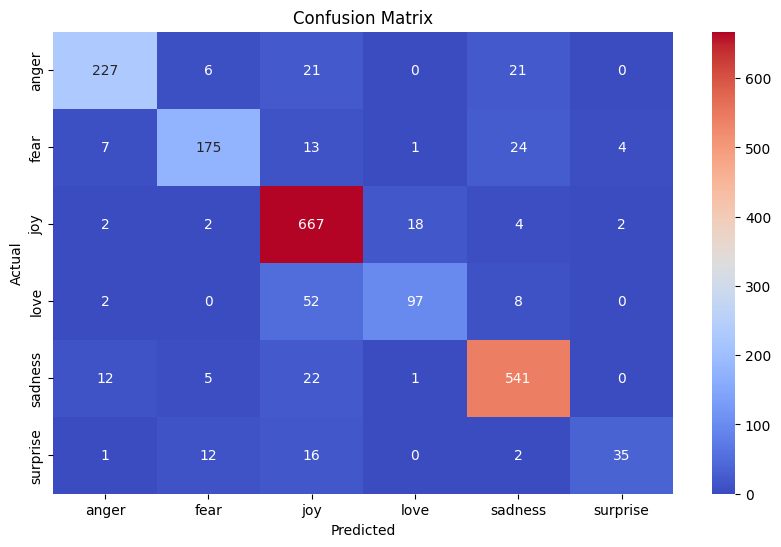

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
# Step 8: Save Model and Vectorizer (optional)
joblib.dump(model, "emotion_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']